In [79]:
import pandas as pd
data = pd.read_csv("diamonds.csv")
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB
None


In [80]:
data.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [81]:
data.tail()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74
53939,53940,0.75,Ideal,D,SI2,62.2,55.0,2757,5.83,5.87,3.64


In [82]:
data.isnull().sum()

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

In [83]:
data = data.drop(columns=['Unnamed: 0'])

In [84]:
print(data.describe())

              carat         depth         table         price             x  \
count  53940.000000  53940.000000  53940.000000  53940.000000  53940.000000   
mean       0.797940     61.749405     57.457184   3932.799722      5.731157   
std        0.474011      1.432621      2.234491   3989.439738      1.121761   
min        0.200000     43.000000     43.000000    326.000000      0.000000   
25%        0.400000     61.000000     56.000000    950.000000      4.710000   
50%        0.700000     61.800000     57.000000   2401.000000      5.700000   
75%        1.040000     62.500000     59.000000   5324.250000      6.540000   
max        5.010000     79.000000     95.000000  18823.000000     10.740000   

                  y             z  
count  53940.000000  53940.000000  
mean       5.734526      3.538734  
std        1.142135      0.705699  
min        0.000000      0.000000  
25%        4.720000      2.910000  
50%        5.710000      3.530000  
75%        6.540000      4.040000  


In [85]:
print(data['cut'].value_counts())

cut
Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: count, dtype: int64


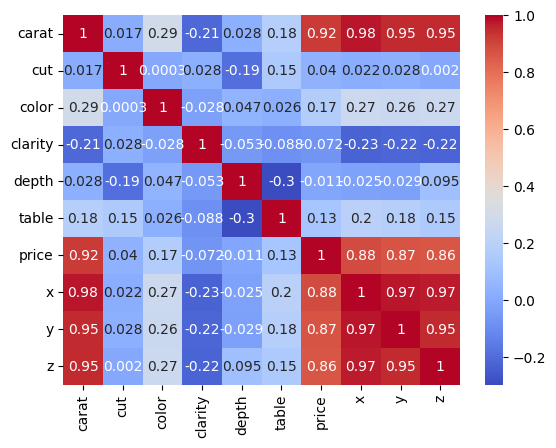

In [86]:
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

encodedData = data.copy()

# Encode categorical columns
for col in ['cut', 'color', 'clarity']:
    encoder = LabelEncoder()
    encodedData[col] = encoder.fit_transform(encodedData[col])

correlation_matrix = encodedData.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.show()

From the heatmap above we can see that the diamonsions of the diamond, the carat and the price have a strong correlation.

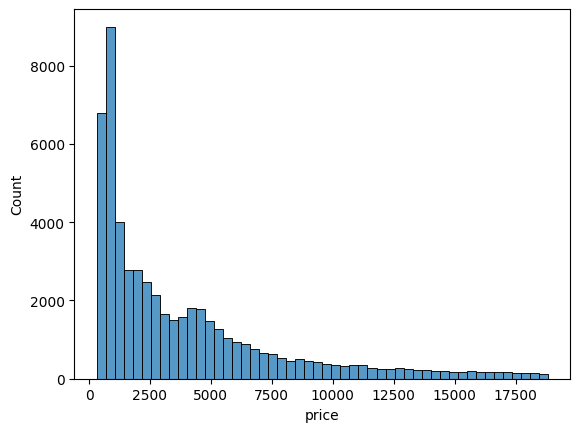

In [87]:
sns.histplot(data['price'], bins=50)
plt.show()

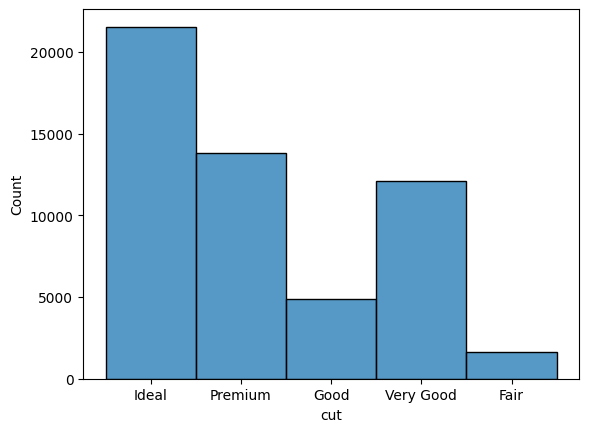

In [88]:
sns.histplot(data['cut'], bins=50)
plt.show()

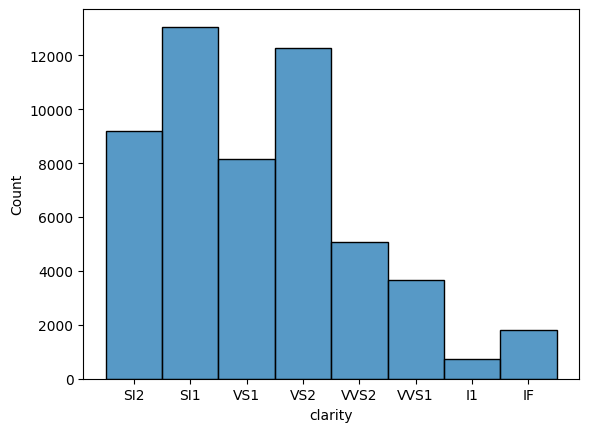

In [89]:
sns.histplot(data['clarity'], bins=50)
plt.show()

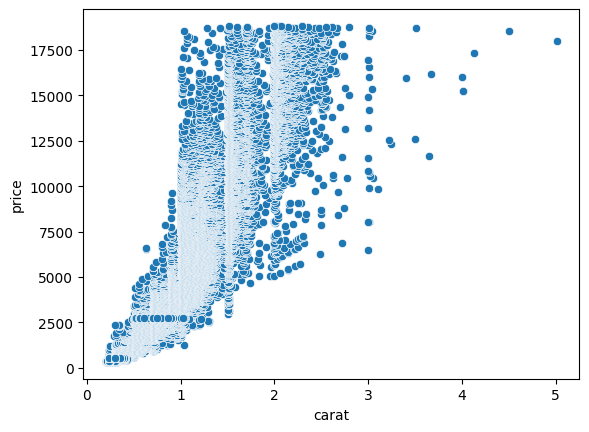

In [90]:
sns.scatterplot(x='carat', y='price', data=data)
plt.show()

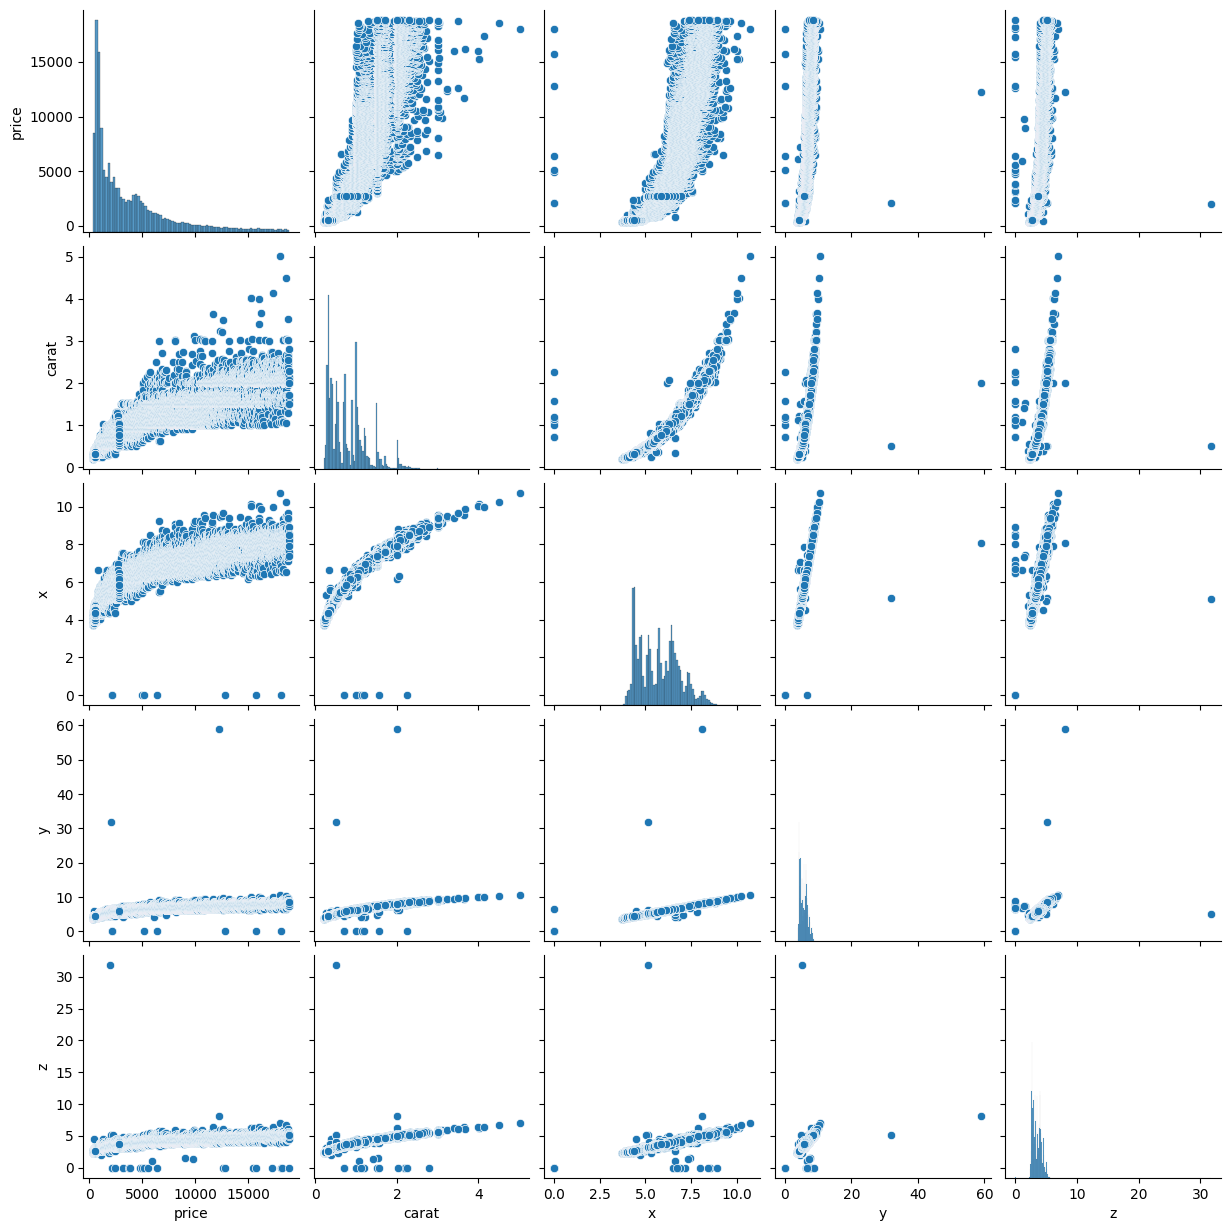

In [91]:
sns.pairplot(data[['price', 'carat', 'x', 'y', 'z']])
plt.show()

In [92]:
data['volume'] = data['x'] * data['y'] * data['z']

Let's see how important our features are for our tasks:

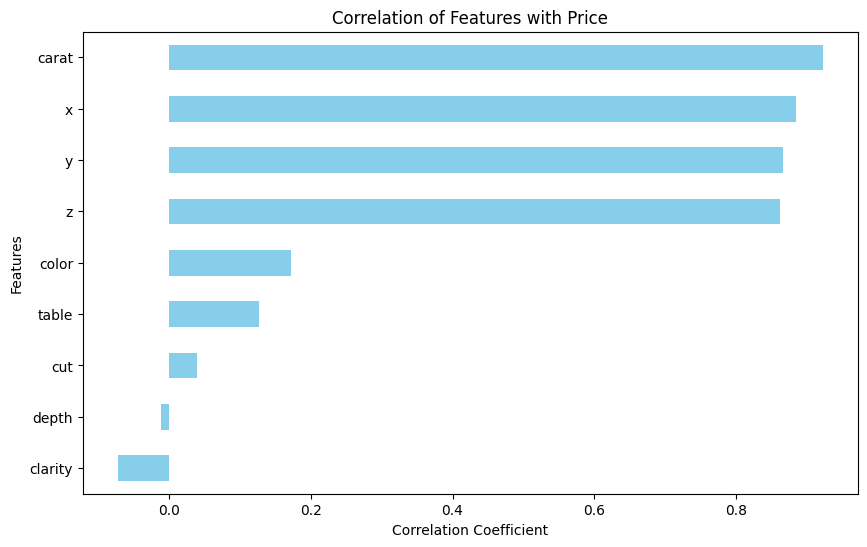

In [93]:
data_copy = encodedData.copy()

correlations = data_copy.corr()['price'].drop('price')

plt.figure(figsize=(10, 6))
correlations.sort_values().plot(kind='barh', color='skyblue')
plt.title("Correlation of Features with Price")
plt.xlabel("Correlation Coefficient")
plt.ylabel("Features")
plt.show()


In [94]:
from sklearn.feature_selection import chi2
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

# Encode categorical target
label_encoder = LabelEncoder()
data_encoded = encodedData.copy()
data_encoded['cut'] = label_encoder.fit_transform(data['cut'])

# Scale numeric features for chi-square test
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(data_encoded.drop('cut', axis=1))
y_cut = data_encoded['cut']

# Perform chi-square test
chi_scores, p_values = chi2(X_scaled, y_cut)

# Create a DataFrame for chi-square scores
chi_scores_df = pd.DataFrame({
    'Feature': data_encoded.drop('cut', axis=1).columns,
    'Chi-Square Score': chi_scores
}).sort_values(by='Chi-Square Score', ascending=False)

# Plot chi-square scores
plt.figure(figsize=(10, 6))
sns.barplot(x='Chi-Square Score', y='Feature', data=chi_scores_df, palette='viridis')
plt.title("Feature Relevance for Predicting Cut")
plt.xlabel("Chi-Square Score")
plt.ylabel("Features")
plt.show()

NameError: name 'data_encoded' is not defined